>#  HW5. 연령대별 성별비율을 산점도로 표현 - 1
학번: A70064, 이름: 안종민

목표: 사용자로부터 지역명을 입력받아, 해당 지역의 0~100세 각 연령별 남성 인구수와 여성 인구수를 산점도(Scatter plot) 로 표현한다.

데이터 출처: 행정안전부 주민등록인구통계 CSV (`population_by_gender.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- 라이브러리 임포트, Colab 드라이브 마운트 등을 실행합니다.

In [ ]:
from google.colab import drive
import csv
import os
import matplotlib.pyplot as plt

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

### 2. 데이터 로드

- `population_by_gender.csv` 파일을 열고 헤더를 건너뛴 뒤, 리스트로 변환합니다.
- 인코딩 확인: CSV 파일이 `CP949(euc-kr)` 인코딩일 경우 `encoding='cp949'` 지정

In [ ]:
f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_by_gender.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 사용자 입력 및 데이터 추출

- 사용자 입력을 받고 해당 행을 찾아 target에 저장합니다.
- `for-else` 로 지역이 없을 때 예외 처리
- `target` 행에서 0~100세 남성 및 여성 인구수를 오름차순으로 리스트에 저장합니다.
- 쉼표 제거 `replace(',', '')` 후 `int()` 변환

인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: 제주


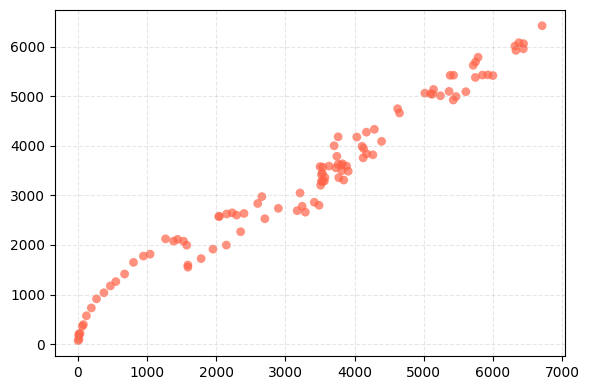

In [ ]:
# 사용자로부터 입력 받기
region = input("인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: ").strip()

# 해당 지역 행 찾기
for row in data:
    if region in row[0]:
        target = row
        break
else:
    raise ValueError(f"'{region}' 데이터를 찾을 수 없습니다.")

#연령대별 남·여 인구수 추출 (0세→100세 순)
#  - 남성: 인덱스 3~103
male = [int(x.replace(',', '')) for x in target[3:104]]
#  - 여성: 슬라이스 -1:-102:-1 후 reverse()
female_slice = target[-1:-102:-1]
female_slice.reverse()
female = [int(x.replace(',', '')) for x in female_slice]

### 4. 시각화 설정 및 Scatter 그래프 출력

- 가로축에 남성, 세로축에 여성 인구수를, 점 색상 및 크기로 구분하여 산점도를 생성합니다.
- `s`, `c`, `alpha` 옵션으로 마커 스타일 조정
- 산점도로 연령대별 남녀 인구 분포를 시각화합니다.

In [ ]:
# scatter 그리기
plt.figure(figsize=(6, 4))
plt.scatter(male, female,
            s=40,            # 점 크기
            c='tomato',     # 색상
            alpha=0.7,       # 투명도
            edgecolors='none')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()